In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import ctd
import glob
import cmocean.cm as cmo
import cartopy.crs as ccrs
import matplotlib as mpl
import cartopy.feature as cfeature
import geopandas as gpd
import gsw
import warnings
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
warnings.filterwarnings("ignore")

font = {'family' : 'Avenir',
        'weight' : 'normal',
        'size'   : 20}
mpl.rc('font', **font)

In [6]:
def add_features(ax):
    
    ax.add_feature(cfeature.LAND,   facecolor='0.8',edgecolor='k',zorder=3)
    ax.add_feature(cfeature.RIVERS, edgecolor='w'  ,zorder=3)
    ax.add_feature(cfeature.LAKES,  facecolor='w'  ,zorder=3)
    ax.set(xlabel='',ylabel='')
    
    gls = ax.gridlines(crs=ccrs.PlateCarree(), 
                        draw_labels=True,
                        x_inline=False, 
                        y_inline=False,
                        linewidth=0.75,
                        alpha=0.75, 
                        linestyle='--',
                        lw=0,
                        color='k',
                        ylocs=mpl.ticker.MultipleLocator(base=2),
                        xlocs=mpl.ticker.MultipleLocator(base=2))

    gls.top_labels = False
    gls.bottom_labels = True
    gls.right_labels = False    
    gls.left_labels = True
    gls.xpadding=10
    gls.ypadding=10
    for k, spine in ax.spines.items():  #ax.spines is a dictionary
        spine.set_zorder(10)

def add_swath(ax):
    Swath = ax.add_geometries(swath.geometry, crs=ccrs.PlateCarree(),zorder=4)
    Swath._kwargs['facecolor'] = 'w'
    Swath._kwargs['edgecolor'] = 'k'
    Swath._kwargs['alpha'] = 0.2

# **1. Plot map**

In [3]:
ds = xr.open_dataset('data/dQUICCHE.nc')
swath = gpd.read_file('/Users/xedhjo/Documents/Projects/QUICCHE/web-portal/data/swot/swot_calval_orbit_june2015-v2_swath.shp')
bathy = xr.open_dataset('/Users/xedhjo/Documents/Projects/QUICCHE/data/gebco_2022_n-30.0_s-45.0_w0.0_e25.0.nc')
bathy = bathy.interp(lon=np.arange(0,25,.05),lat=np.arange(-45,-30,.05))
n = ds.station.max().values
cmap_stn = plt.get_cmap('viridis',n+1)

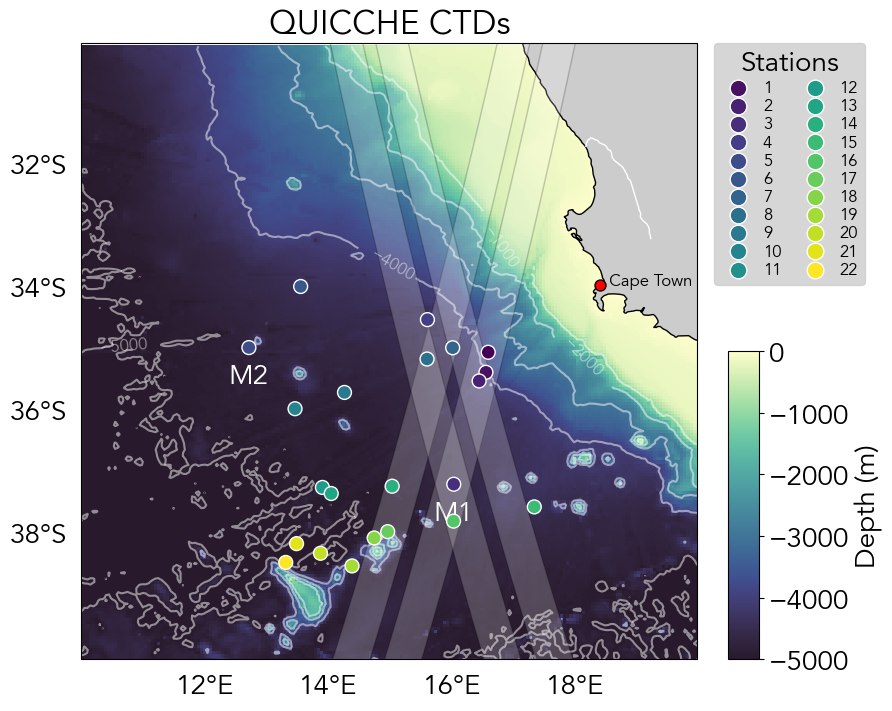

In [25]:
fig,ax=plt.subplots(figsize=(12,8),subplot_kw={'projection':ccrs.PlateCarree()})
bt = bathy.elevation.plot(cmap=cmo.deep_r,vmin=-5000,vmax=0,add_colorbar=False)

#bathy.elevation.plot.contour(levels=np.arange(-5000,0,500)[np.arange(-5000,0,500)%1000 != 0],colors='w',linestyles='--',lw=1,alpha=.5)
cs = bathy.elevation.plot.contour(levels=np.arange(-5000,0,1000),colors='w',linestyles='-',lw=2,alpha=.5)

ax.clabel(cs,fontsize=12)

sct = ds.plot.scatter(ax=ax,
                      x='longitude',
                      y='latitude',
                      s=100,
                      add_guide=False,
                      vmin=1,
                      ec='w',
                      zorder=5,
                      cmap=cmap_stn,
                      hue='station' 
                     )

xlim = ax.get_xlim()
ylim = ax.get_ylim()

for i in range(n):
    ax.scatter(100,100,c=[cmap_stn(i+1)[:3]],label=f'{i+1}',ec='w')

ax.set(xlim=xlim,ylim=ylim,title='QUICCHE CTDs')
ax.legend(ncol=2,
          labelspacing=0.1,
          handletextpad=0.5,
          fontsize=12,
          loc='upper center',
          columnspacing=1,
          frameon=True,
          facecolor='0.8',
          bbox_to_anchor=[1,1,0.3,0.013],
          title='Stations',
          markerscale=2)

ax.text(ds.sel(cast='down').longitude[3],ds.sel(cast='down').latitude[3]-0.25,'M1',c='w',va='top',ha='center')
ax.text(ds.sel(cast='down').longitude[5],ds.sel(cast='down').latitude[5]-0.25,'M2',c='w',va='top',ha='center')

axins = inset_axes(
    ax,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=(1.05, 0., 1, 1),
    bbox_transform=ax.transAxes,
    borderpad=0,
)
plt.colorbar(bt, cax=axins,label='Depth (m)')

add_features(ax)
add_swath(ax)
ax.set_extent([10,20,-40,-30])

ax.scatter([18.4241],[-33.9249],marker='.',fc='r',ec='k',s=250,zorder=10)
ax.text(18.4241,-33.9249,'  Cape Town',zorder=10,fontsize=12)

plt.savefig(f"/Users/xedhjo/Documents/Projects/QUICCHE/data/CTD/figures/QUICCHE_CTDs.png")

In [ ]:
fig,ax=plt.subplots(figsize=(12,8),subplot_kw={'projection':ccrs.PlateCarree()})
bt = bathy.elevation.plot(cmap=cmo.deep_r,vmin=-5000,vmax=0,add_colorbar=False)

#bathy.elevation.plot.contour(levels=np.arange(-5000,0,500)[np.arange(-5000,0,500)%1000 != 0],colors='w',linestyles='--',lw=1,alpha=.5)
cs = bathy.elevation.plot.contour(levels=np.arange(-5000,0,1000),colors='w',linestyles='-',lw=2,alpha=.5)

ax.clabel(cs,fontsize=12)

sct = ds.plot.scatter(ax=ax,
                      x='longitude',
                      y='latitude',
                      s=100,
                      add_guide=False,
                      vmin=1,
                      ec='w',
                      zorder=5,
                      cmap=cmap_stn,
                      hue='station' 
                     )

xlim = ax.get_xlim()
ylim = ax.get_ylim()

for i in range(n):
    ax.scatter(100,100,c=[cmap_stn(i+1)[:3]],label=f'{i+1}',ec='w')

ax.set(xlim=xlim,ylim=ylim,title='QUICCHE CTDs')
ax.legend(ncol=2,
          labelspacing=0.1,
          handletextpad=0.5,
          fontsize=12,
          loc='upper center',
          columnspacing=1,
          frameon=False,
          bbox_to_anchor=[1,1,0.3,0.025],
          title='Stations',
          markerscale=2)

ax.text(ds.sel(cast='down').longitude[3],ds.sel(cast='down').latitude[3]-0.25,'M1',c='w',va='top',ha='center')
ax.text(ds.sel(cast='down').longitude[5],ds.sel(cast='down').latitude[5]-0.25,'M2',c='w',va='top',ha='center')

axins = inset_axes(
    ax,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=(1.05, 0., 1, 1),
    bbox_transform=ax.transAxes,
    borderpad=0,
)
plt.colorbar(bt, cax=axins,label='Depth (m)')

#ax.text()

add_features(ax)
add_swath(ax)
ax.set_extent([10,20,-40,-30])

#plt.savefig(f"/Users/xedhjo/Documents/Projects/QUICCHE/data/CTD/figures/QUICCHE_CTDs.png")

In [5]:
sbk = pd.read_csv('/Users/xedhjo/Documents/Projects/QUICCHE/data/Kringla_meta_20230306.csv')
sx57 = pd.read_csv('/Users/xedhjo/Documents/Projects/QUICCHE/data/SEA057_20230307.csv')
sx70 = pd.read_csv('/Users/xedhjo/Documents/Projects/QUICCHE/data/SEA070_20230306.csv')
wg = pd.read_csv('/Users/xedhjo/Documents/Projects/QUICCHE/data/wg_20230306.csv')
sbpp = pd.read_csv('/Users/xedhjo/Downloads/SB2326A.txt',sep='\t')

In [6]:
sbpp['Time'] = sbpp['Time'].values.astype('datetime64[s]')
sbpp = sbpp.set_index('Time').to_xarray().sel(Time=slice('2023-03-09 15:12:48','2023-03-10 09:53:42'))

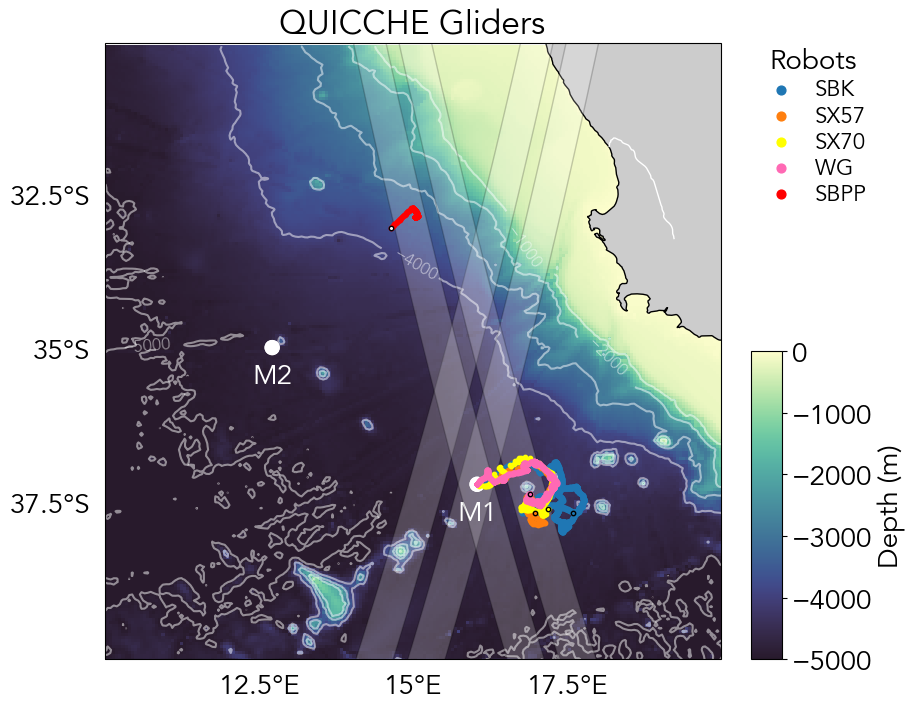

In [7]:
fig,ax=plt.subplots(figsize=(12,8),subplot_kw={'projection':ccrs.PlateCarree()})
bt = bathy.elevation.plot(cmap=cmo.deep_r,vmin=-5000,vmax=0,add_colorbar=False)

#bathy.elevation.plot.contour(levels=np.arange(-5000,0,500)[np.arange(-5000,0,500)%1000 != 0],colors='w',linestyles='--',lw=1,alpha=.5)
cs = bathy.elevation.plot.contour(levels=np.arange(-5000,0,1000),colors='w',linestyles='-',lw=2,alpha=.5)

ax.clabel(cs,fontsize=12)

sct = ds.sel(station=[4,6]).plot.scatter(ax=ax,
                      x='longitude',
                      y='latitude',
                      s=100,
                      add_guide=False,
                      vmin=1,
                      ec=['w','w'],
                      zorder=5,
                      cmap=plt.get_cmap('viridis',11),
                                        c='w')
sbk.plot.scatter(ax=ax,x='lon',y='lat',c='C0',zorder=5,s=10,label='SBK')
sx57.plot.scatter(ax=ax,x='longitude',y='latitude',c='C1',zorder=5,s=10,label='SX57')
sx70.plot.scatter(ax=ax,x='longitude',y='latitude',c='yellow',zorder=5,s=10,label='SX70')
wg.plot.scatter(ax=ax,x='lon',y='lat',c='hotpink',zorder=5,s=10,label='WG')
sbpp.plot.scatter(ax=ax,x='Long',y='Lat',fc='r',zorder=5,s=10,label='SBPP')

ax.scatter(sbk['lon'].values[-1],sbk['lat'].values[-1],c='C0',zorder=5,s=10,ec='k')
ax.scatter(sx57['longitude'].values[-1],sx57['latitude'].values[-1],c='C1',zorder=5,s=10,ec='k')
ax.scatter(sx70['longitude'].values[-1],sx70['latitude'].values[-1],c='yellow',zorder=5,s=10,ec='k')
ax.scatter(wg['lon'].values[-1],wg['lat'].values[-1],c='hotpink',zorder=5,s=10,ec='k')
ax.scatter(sbpp['Long'].values[-1],sbpp['Lat'].values[-1],fc='w',zorder=5,s=10,ec='k')


xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.set(xlim=xlim,ylim=ylim,title='QUICCHE Gliders')

ax.text(ds.sel(cast='down').longitude[3],ds.sel(cast='down').latitude[3]-0.25,'M1',c='w',va='top',ha='center')
ax.text(ds.sel(cast='down').longitude[5],ds.sel(cast='down').latitude[5]-0.25,'M2',c='w',va='top',ha='center')

axins = inset_axes(
    ax,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=(1.05, 0., 1, 1),
    bbox_transform=ax.transAxes,
    borderpad=0,
)
plt.colorbar(bt, cax=axins,label='Depth (m)')

ax.legend(ncol=1,
          labelspacing=0.1,
          handletextpad=0.5,
          fontsize=16,
          loc='upper center',
          columnspacing=0.2,
          frameon=False,
          bbox_to_anchor=[1,1,0.3,0.025],
          title='Robots',
          markerscale=2)

add_features(ax)
add_swath(ax)
ax.set_extent([10,20,-40,-30])